# Benchmark Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# import self writted modules
from preprocess import join_sales_products, set_datetime_index
from models.exponential_smoothing import forecast_stderrors
from evaluation.metrics import print_relevant_metrics
from evaluation.visualization import plot_forecast_interval, gaussian_confidence_bands

path = '~/Documents/interview_challenge/amorelie_task/data/'
df_sales = pd.read_csv(path + 'sales.csv')
df_products = pd.read_csv(path + 'products.csv')

df = join_sales_products(df_sales, df_products)
df = set_datetime_index(df)
df.head()

,product_id,website,date,units_sold,selling_price,promotion_dummy_1,promotion_dummy_2,brand,main_category_id,parent_category_id
date,,,,,,,,,,
2015-01-01,14530,1,2015-01-01,0,9.90,No,No,5,616,5
2015-01-01,17774,2,2015-01-01,0,13.72,No,No,7,210,5
2015-01-01,14554,3,2015-01-01,11,9.90,No,No,5,618,5
2015-01-01,17774,3,2015-01-01,2,12.90,No,No,7,210,5
2015-01-01,18098,1,2015-01-01,0,19.90,No,No,8,651,5


## Naive Benchmark
Last 5 weeks of the train set as forecast for the 5 weeks in the test set 

In [2]:
df_sku = df[df['product_id'] == 46688]  
y = df_sku['units_sold']
    
# aggreage daily data
sold_daily = df_sku['units_sold'].groupby(pd.Grouper(freq='D')).sum()
prices_mean_daily = df_sku['selling_price'].groupby(pd.Grouper(freq='D')).mean() 

# split into train test 
n_test = 35  # 20 weeks of prediction

train = sold_daily.iloc[:-(n_test)]
test = sold_daily.tail(n_test)
price_mean_test = prices_mean_daily.tail(n_test)

yhat_naive = train.tail(n_test)  
print_relevant_metrics(test.values, yhat_naive.values, 'naive model for 46688',  price_mean_test)

-----------------------naive model for 46688: Evaluation on y set ----------------------------------
Count of Overstocked items: 132
Count of Understocked items: 89
Total_Value of Understocked Items: 1042.4866666666665
Estimated Monetary Costs: 236.24866666666668
Under/Overstocking Balance Loss: 1022
MSE: 65.62857142857143
RMSE: 8.101146303367903
Median Absolut Error 6.0
MAP: 6.314285714285714
R2: -0.6272973848271393


## Exponential Smoothing to predict daily sales
Results:
- seems to be only useful with a few SKUs 
- not suitable for our problem, but a first benchmark without much preprocessing

14530
-----------------------naive model for 14530: Evaluation on y set ----------------------------------
Count of Overstocked items: 16
Count of Understocked items: 27
Total_Value of Understocked Items: 307.98
Estimated Monetary Costs: 46.798
Under/Overstocking Balance Loss: 286
MSE: 2.7142857142857144
RMSE: 1.647508942095828
Median Absolut Error 1.0
MAP: 1.2285714285714286
R2: -0.5788224121557453
-----------------------ES for 14530: Evaluation on y set ----------------------------------
Count of Overstocked items: 1.0
Count of Understocked items: 38.0
Total_Value of Understocked Items: 433.45333333333326
Estimated Monetary Costs: 44.34533333333334
Under/Overstocking Balance Loss: 381.0
MSE: 3.0
RMSE: 1.7320508075688772
Median Absolut Error 1.0
MAP: 1.1142857142857143
R2: -0.7450142450142447


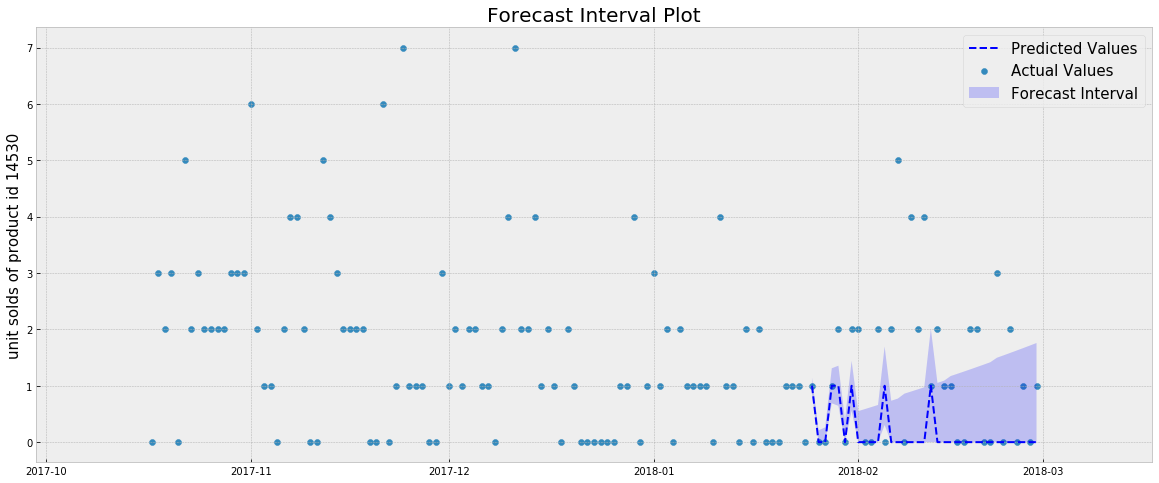

14554
-----------------------naive model for 14554: Evaluation on y set ----------------------------------
Count of Overstocked items: 36
Count of Understocked items: 34
Total_Value of Understocked Items: 420.4666666666667
Estimated Monetary Costs: 78.04666666666667
Under/Overstocking Balance Loss: 376
MSE: 7.085714285714285
RMSE: 2.6619005025947695
Median Absolut Error 2.0
MAP: 2.0
R2: -0.8650623119896861
-----------------------ES for 14554: Evaluation on y set ----------------------------------
Count of Overstocked items: 41.0
Count of Understocked items: 27.0
Total_Value of Understocked Items: 333.90000000000003
Estimated Monetary Costs: 74.39
Under/Overstocking Balance Loss: 311.0
MSE: 6.685714285714286
RMSE: 2.585674822114004
Median Absolut Error 2.0
MAP: 1.9428571428571428
R2: -0.759776536312849


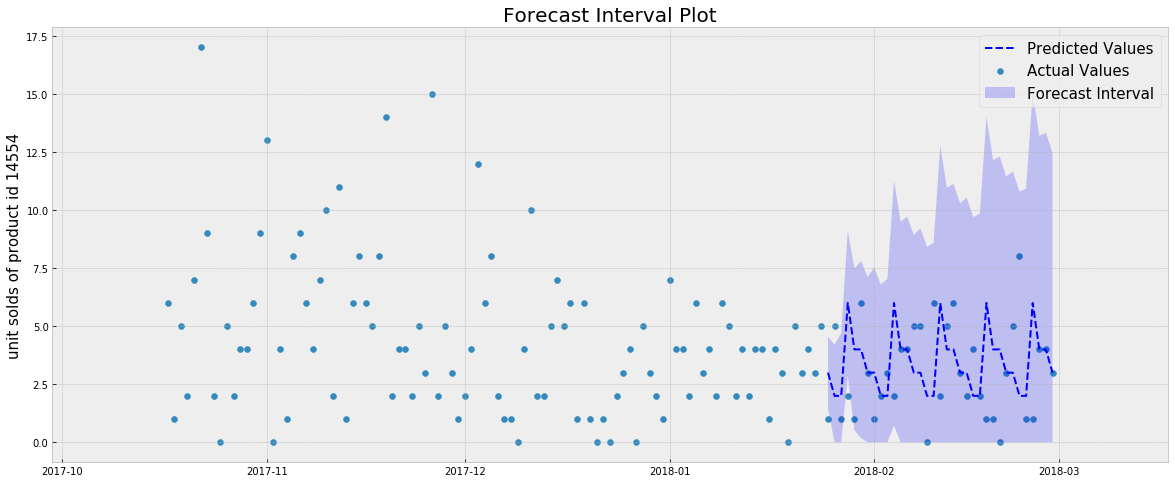

17774
-----------------------naive model for 17774: Evaluation on y set ----------------------------------
Count of Overstocked items: 22
Count of Understocked items: 18
Total_Value of Understocked Items: 240.60000000000008
Estimated Monetary Costs: 46.06
Under/Overstocking Balance Loss: 202
MSE: 2.1142857142857143
RMSE: 1.4540583599999397
Median Absolut Error 1.0
MAP: 1.1428571428571428
R2: -0.37037037037037046
-----------------------ES for 17774: Evaluation on y set ----------------------------------
Count of Overstocked items: 14.0
Count of Understocked items: 19.0
Total_Value of Understocked Items: 253.9666666666667
Estimated Monetary Costs: 39.39666666666667
Under/Overstocking Balance Loss: 204.0
MSE: 1.9142857142857144
RMSE: 1.3835771443203715
Median Absolut Error 1.0
MAP: 0.9428571428571428
R2: -0.2407407407407407


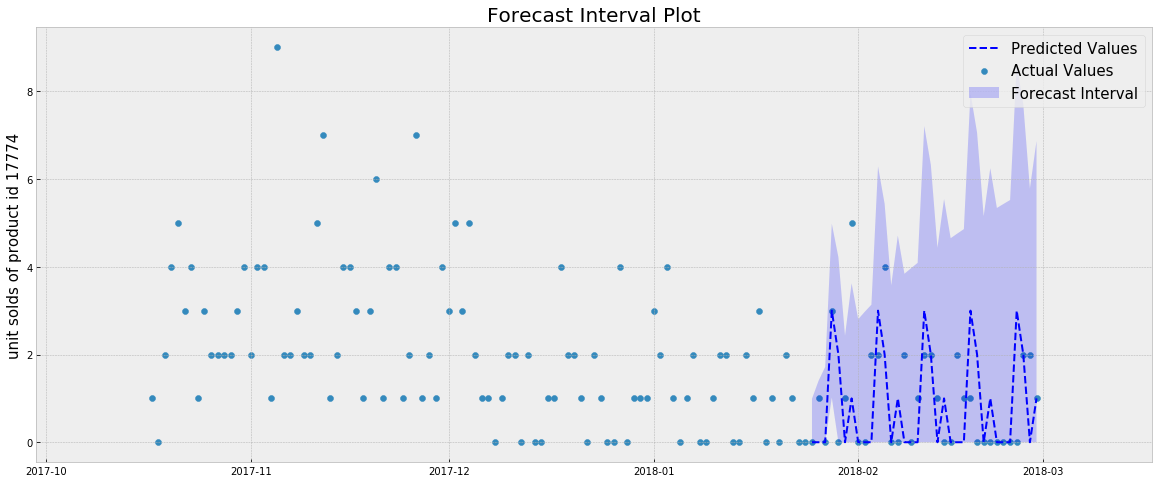

18098
-----------------------naive model for 18098: Evaluation on y set ----------------------------------
Count of Overstocked items: 41
Count of Understocked items: 103
Total_Value of Understocked Items: 2598.69
Estimated Monetary Costs: 300.86899999999997
Under/Overstocking Balance Loss: 1071
MSE: 27.257142857142856
RMSE: 5.220837371259792
Median Absolut Error 3.0
MAP: 4.114285714285714
R2: -0.7152984691256545
-----------------------ES for 18098: Evaluation on y set ----------------------------------
Count of Overstocked items: 6.0
Count of Understocked items: 100.0
Total_Value of Understocked Items: 2523.0
Estimated Monetary Costs: 258.3
Under/Overstocking Balance Loss: 1006.0
MSE: 19.2
RMSE: 4.381780460041329
Median Absolut Error 2.0
MAP: 3.0285714285714285
R2: -0.20826055686838574


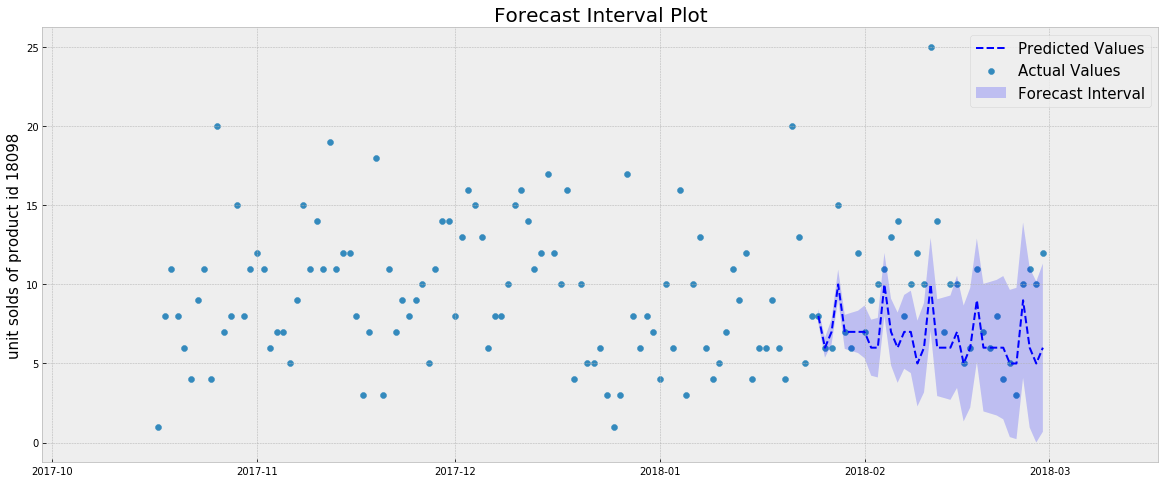

37267
-----------------------naive model for 37267: Evaluation on y set ----------------------------------
Count of Overstocked items: 5
Count of Understocked items: 1
Total_Value of Understocked Items: 125.20666666666666
Estimated Monetary Costs: 17.520666666666667
Under/Overstocking Balance Loss: 15
MSE: 0.22857142857142856
RMSE: 0.47809144373375745
Median Absolut Error 0.0
MAP: 0.17142857142857143
R2: -7.235294117647058
-----------------------ES for 37267: Evaluation on y set ----------------------------------
Count of Overstocked items: 0.0
Count of Understocked items: 1.0
Total_Value of Understocked Items: 125.20666666666666
Estimated Monetary Costs: 12.520666666666667
Under/Overstocking Balance Loss: 10.0
MSE: 0.02857142857142857
RMSE: 0.1690308509457033
Median Absolut Error 0.0
MAP: 0.02857142857142857
R2: -0.02941176470588225


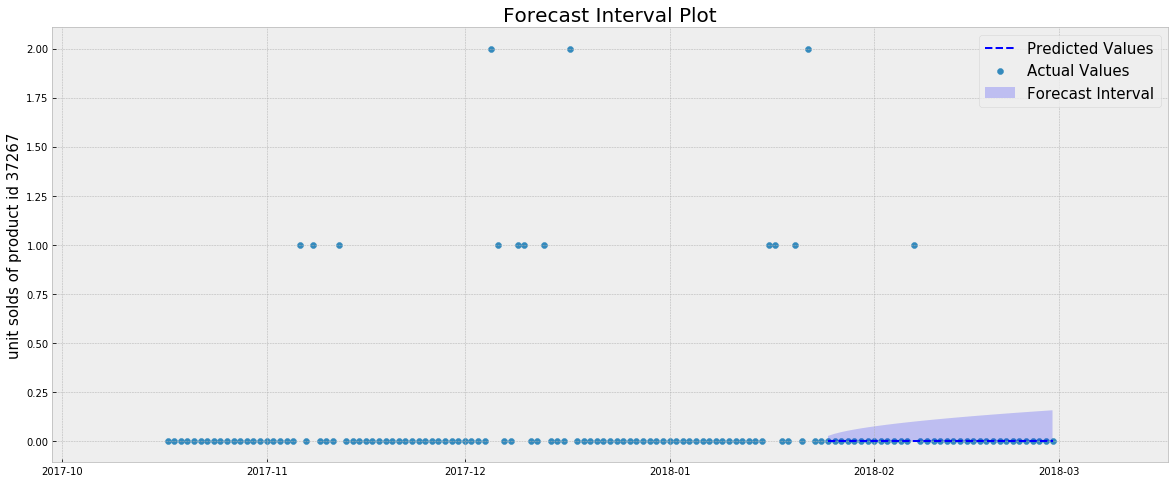

38077
-----------------------naive model for 38077: Evaluation on y set ----------------------------------
Count of Overstocked items: 13
Count of Understocked items: 40
Total_Value of Understocked Items: 1886.8000000000002
Estimated Monetary Costs: 201.68000000000004
Under/Overstocking Balance Loss: 413
MSE: 3.742857142857143
RMSE: 1.9346465162548798
Median Absolut Error 1.0
MAP: 1.5142857142857142
R2: -1.3955067920585158
-----------------------ES for 38077: Evaluation on y set ----------------------------------
Count of Overstocked items: 2.0
Count of Understocked items: 43.0
Total_Value of Understocked Items: 2028.31
Estimated Monetary Costs: 204.83100000000007
Under/Overstocking Balance Loss: 432.0
MSE: 2.8857142857142857
RMSE: 1.6987390281365427
Median Absolut Error 1.0
MAP: 1.2857142857142858
R2: -0.846917450365726


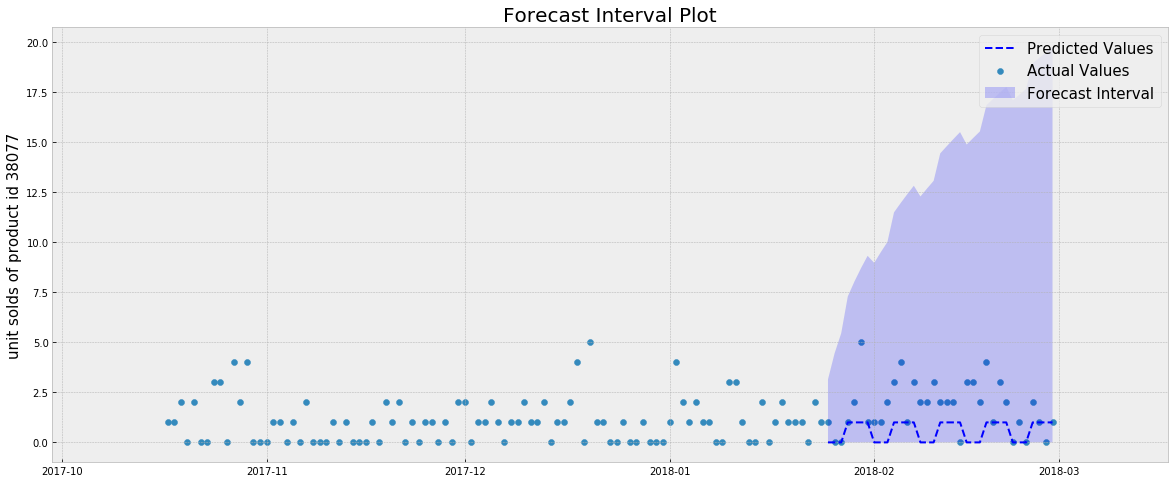

38078
-----------------------naive model for 38078: Evaluation on y set ----------------------------------
Count of Overstocked items: 8
Count of Understocked items: 12
Total_Value of Understocked Items: 566.04
Estimated Monetary Costs: 64.604
Under/Overstocking Balance Loss: 128
MSE: 1.542857142857143
RMSE: 1.2421180068162376
Median Absolut Error 0.0
MAP: 0.5714285714285714
R2: -0.40625
-----------------------ES for 38078: Evaluation on y set ----------------------------------
Count of Overstocked items: 8.0
Count of Understocked items: 7.0
Total_Value of Understocked Items: 330.18999999999994
Estimated Monetary Costs: 41.019
Under/Overstocking Balance Loss: 78.0
MSE: 1.0
RMSE: 1.0
Median Absolut Error 0.0
MAP: 0.42857142857142855
R2: 0.08854166666666663


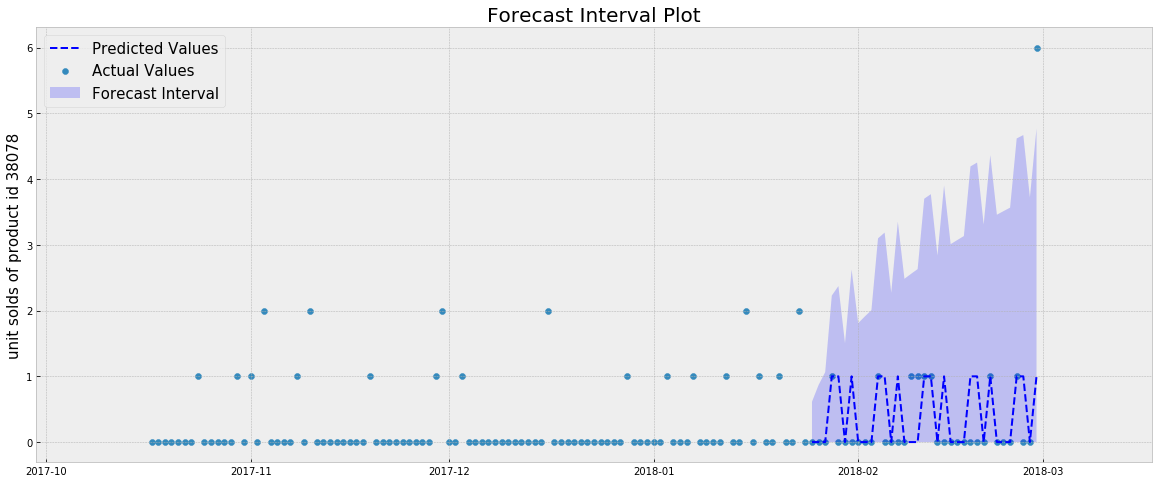

44332
-----------------------naive model for 44332: Evaluation on y set ----------------------------------
Count of Overstocked items: 2
Count of Understocked items: 9
Total_Value of Understocked Items: 906.8499999999999
Estimated Monetary Costs: 92.685
Under/Overstocking Balance Loss: 92
MSE: 0.5428571428571428
RMSE: 0.7367883976130072
Median Absolut Error 0.0
MAP: 0.3142857142857143
R2: -0.4029535864978906
-----------------------ES for 44332: Evaluation on y set ----------------------------------
Count of Overstocked items: 0.0
Count of Understocked items: 11.0
Total_Value of Understocked Items: 1094.4833333333331
Estimated Monetary Costs: 109.44833333333332
Under/Overstocking Balance Loss: 110.0
MSE: 0.4857142857142857
RMSE: 0.6969320524371696
Median Absolut Error 0.0
MAP: 0.3142857142857143
R2: -0.25527426160337563


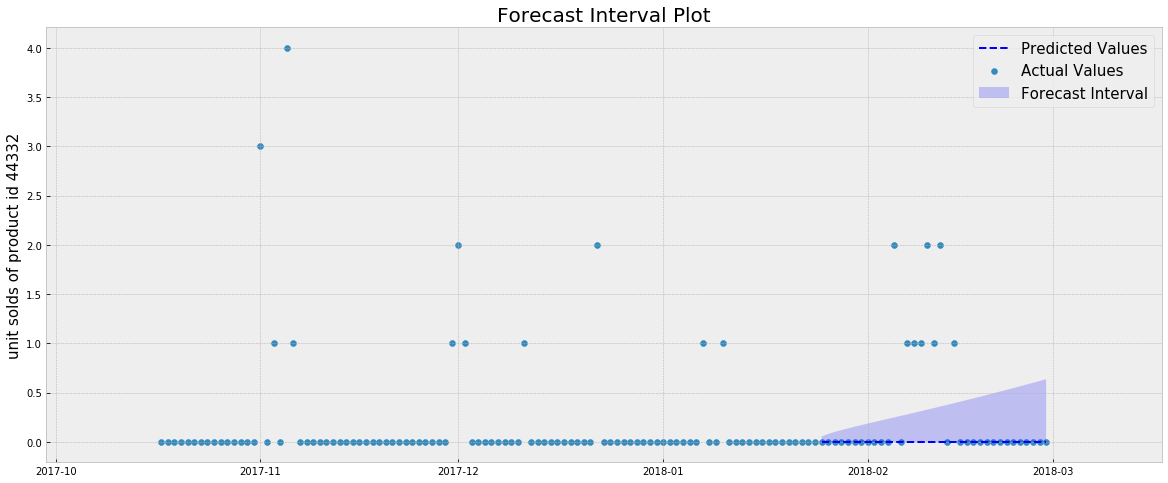

44333
-----------------------naive model for 44333: Evaluation on y set ----------------------------------
Count of Overstocked items: 3
Count of Understocked items: 3
Total_Value of Understocked Items: 375.2
Estimated Monetary Costs: 40.52
Under/Overstocking Balance Loss: 33
MSE: 0.17142857142857143
RMSE: 0.4140393356054125
Median Absolut Error 0.0
MAP: 0.17142857142857143
R2: -0.6935483870967738
-----------------------ES for 44333: Evaluation on y set ----------------------------------
Count of Overstocked items: 0.0
Count of Understocked items: 4.0
Total_Value of Understocked Items: 500.26666666666665
Estimated Monetary Costs: 50.02666666666667
Under/Overstocking Balance Loss: 40.0
MSE: 0.11428571428571428
RMSE: 0.3380617018914066
Median Absolut Error 0.0
MAP: 0.11428571428571428
R2: -0.1290322580645158


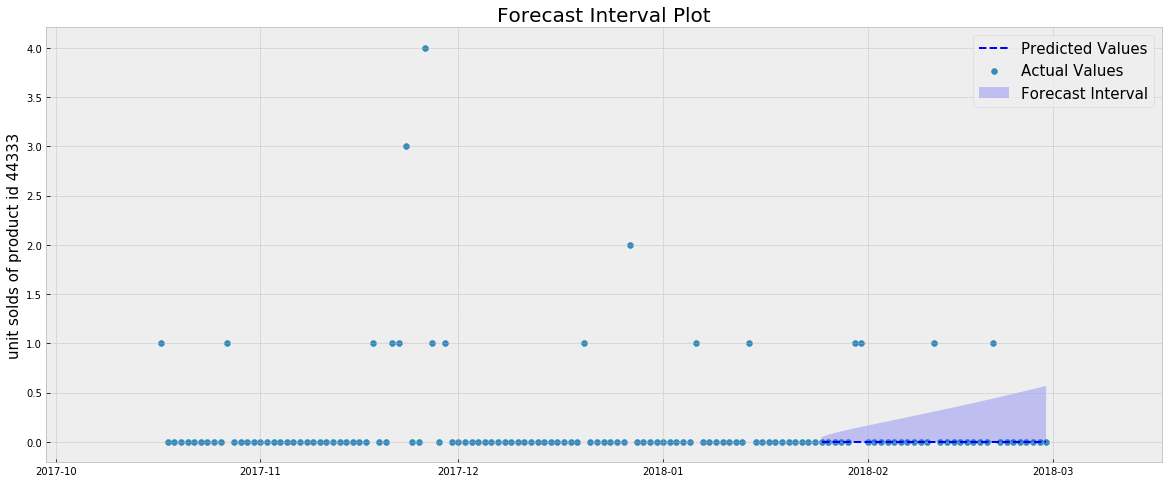

45387
-----------------------naive model for 45387: Evaluation on y set ----------------------------------
Count of Overstocked items: 55
Count of Understocked items: 33
Total_Value of Understocked Items: 331.98
Estimated Monetary Costs: 88.19800000000001
Under/Overstocking Balance Loss: 385
MSE: 12.514285714285714
RMSE: 3.537553634121427
Median Absolut Error 2.0
MAP: 2.5142857142857142
R2: -2.3038793103448274
-----------------------ES for 45387: Evaluation on y set ----------------------------------
Count of Overstocked items: 38.0
Count of Understocked items: 17.0
Total_Value of Understocked Items: 171.02
Estimated Monetary Costs: 55.102000000000004
Under/Overstocking Balance Loss: 208.0
MSE: 3.742857142857143
RMSE: 1.9346465162548798
Median Absolut Error 2.0
MAP: 1.5714285714285714
R2: 0.01185344827586221


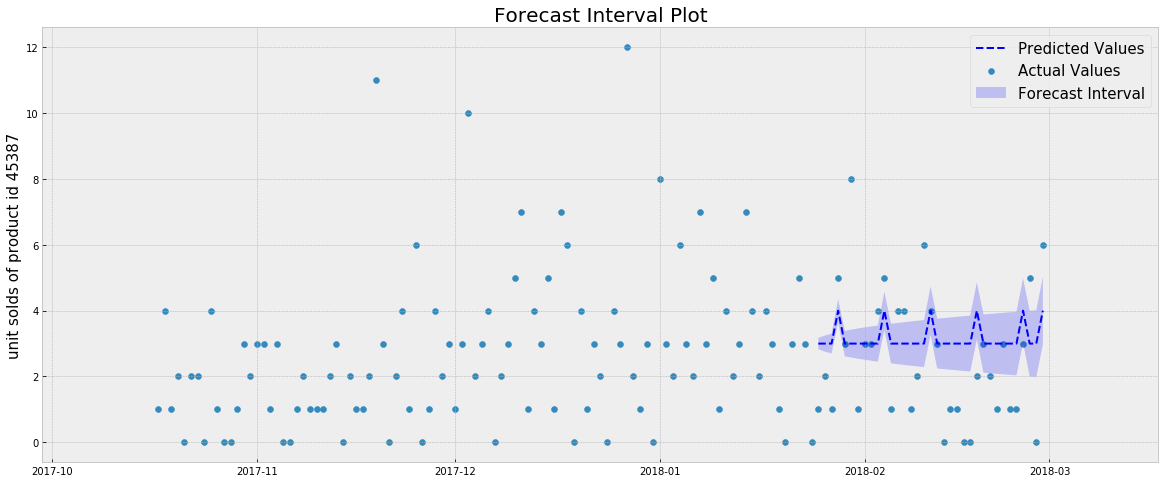

46220
-----------------------naive model for 46220: Evaluation on y set ----------------------------------
Count of Overstocked items: 15
Count of Understocked items: 13
Total_Value of Understocked Items: 451.0133333333333
Estimated Monetary Costs: 60.10133333333333
Under/Overstocking Balance Loss: 145
MSE: 1.4857142857142858
RMSE: 1.218898800440088
Median Absolut Error 1.0
MAP: 0.8
R2: -2.105802047781569
-----------------------ES for 46220: Evaluation on y set ----------------------------------
Count of Overstocked items: 1.0
Count of Understocked items: 16.0
Total_Value of Understocked Items: 555.0933333333334
Estimated Monetary Costs: 56.50933333333332
Under/Overstocking Balance Loss: 161.0
MSE: 0.7142857142857143
RMSE: 0.8451542547285166
Median Absolut Error 0.0
MAP: 0.4857142857142857
R2: -0.4931740614334468


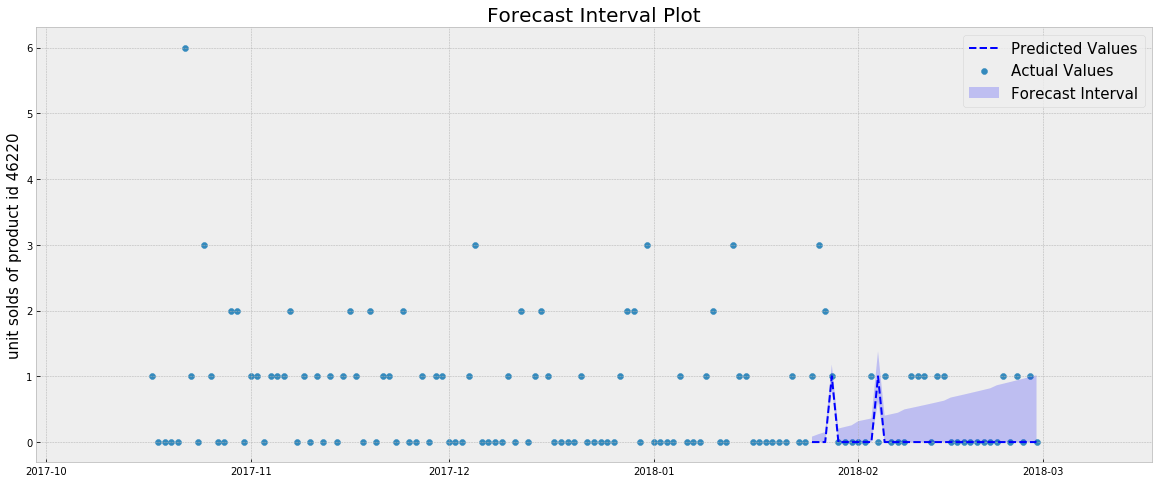

46688
-----------------------naive model for 46688: Evaluation on y set ----------------------------------
Count of Overstocked items: 132
Count of Understocked items: 89
Total_Value of Understocked Items: 1042.4866666666665
Estimated Monetary Costs: 236.24866666666668
Under/Overstocking Balance Loss: 1022
MSE: 65.62857142857143
RMSE: 8.101146303367903
Median Absolut Error 6.0
MAP: 6.314285714285714
R2: -0.6272973848271393
-----------------------ES for 46688: Evaluation on y set ----------------------------------
Count of Overstocked items: 121.0
Count of Understocked items: 41.0
Total_Value of Understocked Items: 480.24666666666667
Estimated Monetary Costs: 169.02466666666666
Under/Overstocking Balance Loss: 531.0
MSE: 31.257142857142856
RMSE: 5.590808783811413
Median Absolut Error 5.0
MAP: 4.628571428571429
R2: 0.22496154157558113


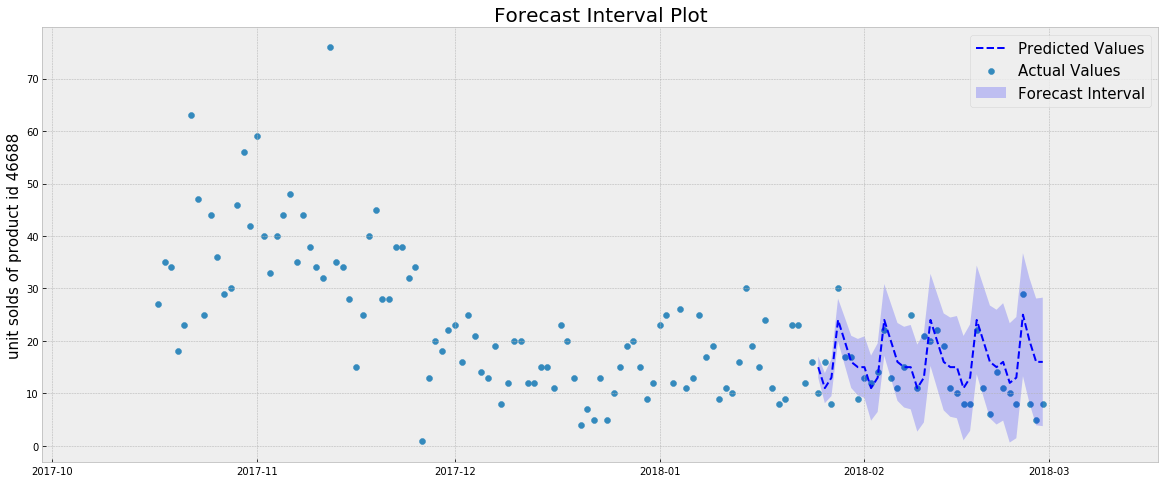

46841
-----------------------naive model for 46841: Evaluation on y set ----------------------------------
Count of Overstocked items: 52
Count of Understocked items: 130
Total_Value of Understocked Items: 17915.300000000003
Estimated Monetary Costs: 1843.53
Under/Overstocking Balance Loss: 1352
MSE: 46.628571428571426
RMSE: 6.828511655446699
Median Absolut Error 4.0
MAP: 5.2
R2: -0.19248434237995826
-----------------------ES for 46841: Evaluation on y set ----------------------------------
Count of Overstocked items: 49.0
Count of Understocked items: 100.0
Total_Value of Understocked Items: 13781.0
Estimated Monetary Costs: 1427.1000000000004
Under/Overstocking Balance Loss: 1049.0
MSE: 33.22857142857143
RMSE: 5.7644229050765725
Median Absolut Error 3.0
MAP: 4.257142857142857
R2: 0.1502087682672233


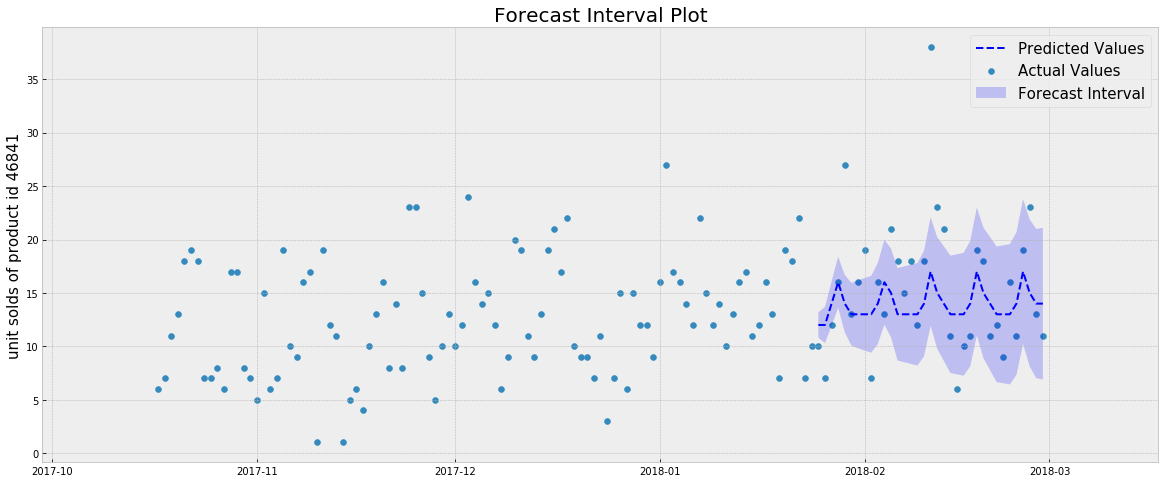

46842
-----------------------naive model for 46842: Evaluation on y set ----------------------------------
Count of Overstocked items: 44
Count of Understocked items: 94
Total_Value of Understocked Items: 12954.14
Estimated Monetary Costs: 1339.414
Under/Overstocking Balance Loss: 984
MSE: 35.77142857142857
RMSE: 5.980922050271896
Median Absolut Error 2.0
MAP: 3.942857142857143
R2: -0.696082984982195
-----------------------ES for 46842: Evaluation on y set ----------------------------------
Count of Overstocked items: 64.0
Count of Understocked items: 59.0
Total_Value of Understocked Items: 8130.790000000001
Estimated Monetary Costs: 877.0789999999998
Under/Overstocking Balance Loss: 654.0
MSE: 18.37142857142857
RMSE: 4.286190449738388
Median Absolut Error 3.0
MAP: 3.5142857142857142
R2: 0.12892862672240302


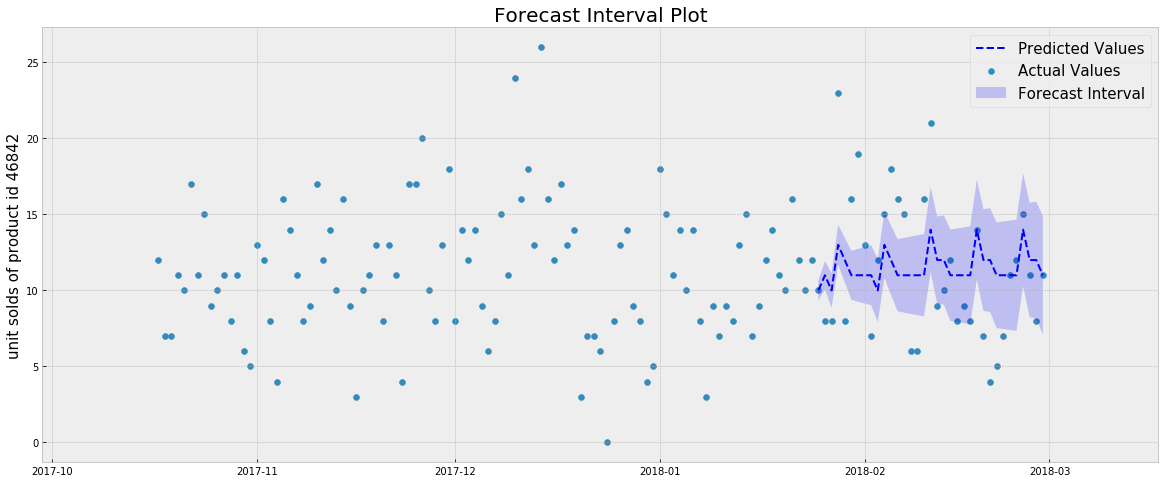

46853
-----------------------naive model for 46853: Evaluation on y set ----------------------------------
Count of Overstocked items: 66
Count of Understocked items: 30
Total_Value of Understocked Items: 3809.4999999999995
Estimated Monetary Costs: 446.95
Under/Overstocking Balance Loss: 366
MSE: 11.657142857142857
RMSE: 3.4142558277233497
Median Absolut Error 2.0
MAP: 2.742857142857143
R2: -1.1636363636363636
-----------------------ES for 46853: Evaluation on y set ----------------------------------
Count of Overstocked items: 52.0
Count of Understocked items: 17.0
Total_Value of Understocked Items: 2158.7166666666662
Estimated Monetary Costs: 267.87166666666667
Under/Overstocking Balance Loss: 222.0
MSE: 6.257142857142857
RMSE: 2.501428163498376
Median Absolut Error 2.0
MAP: 1.9714285714285715
R2: -0.16136363636363638


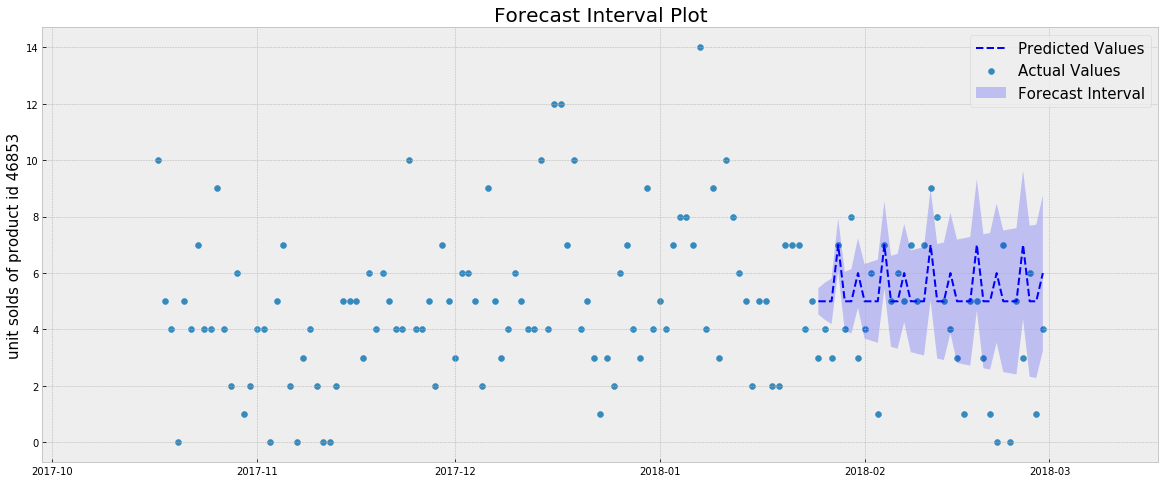

47369
-----------------------naive model for 47369: Evaluation on y set ----------------------------------
Count of Overstocked items: 18
Count of Understocked items: 33
Total_Value of Understocked Items: 1404.37
Estimated Monetary Costs: 158.43699999999998
Under/Overstocking Balance Loss: 348
MSE: 3.8
RMSE: 1.9493588689617927
Median Absolut Error 1.0
MAP: 1.457142857142857
R2: -1.1216955332725616
-----------------------ES for 47369: Evaluation on y set ----------------------------------
Count of Overstocked items: 13.0
Count of Understocked items: 24.0
Total_Value of Understocked Items: 1021.3599999999997
Estimated Monetary Costs: 115.13600000000001
Under/Overstocking Balance Loss: 253.0
MSE: 2.085714285714286
RMSE: 1.4442002235542986
Median Absolut Error 1.0
MAP: 1.0571428571428572
R2: -0.16453965360072909


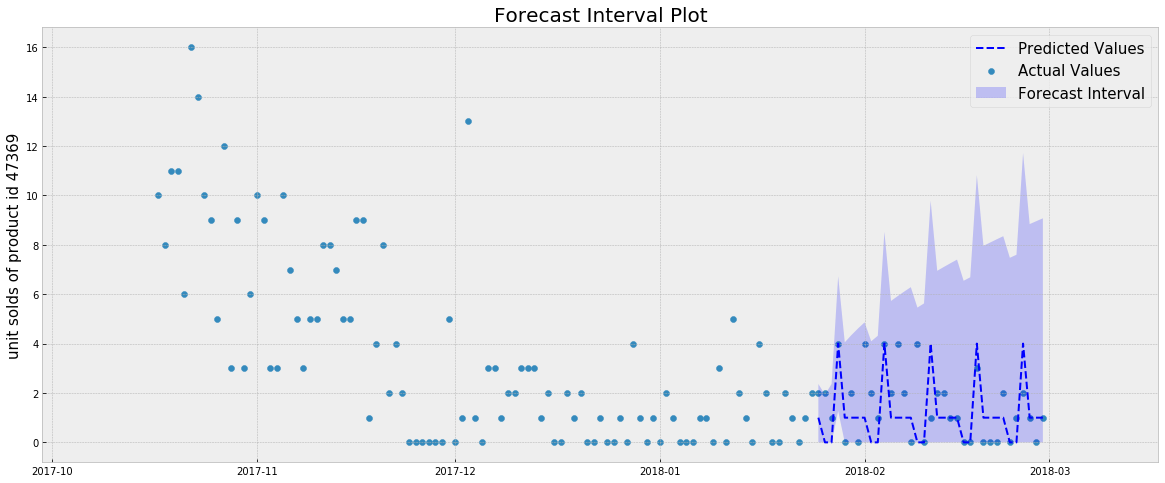

54417
-----------------------naive model for 54417: Evaluation on y set ----------------------------------
Count of Overstocked items: 19
Count of Understocked items: 109
Total_Value of Understocked Items: 17445.086666666662
Estimated Monetary Costs: 1763.5086666666664
Under/Overstocking Balance Loss: 1109
MSE: 19.942857142857143
RMSE: 4.465742619414731
Median Absolut Error 3.0
MAP: 3.657142857142857
R2: -0.2592783505154641
-----------------------ES for 54417: Evaluation on y set ----------------------------------
Count of Overstocked items: 27.0
Count of Understocked items: 65.0
Total_Value of Understocked Items: 10403.033333333333
Estimated Monetary Costs: 1067.3033333333333
Under/Overstocking Balance Loss: 677.0
MSE: 13.485714285714286
RMSE: 3.672290060127915
Median Absolut Error 2.0
MAP: 2.6285714285714286
R2: 0.1484536082474226


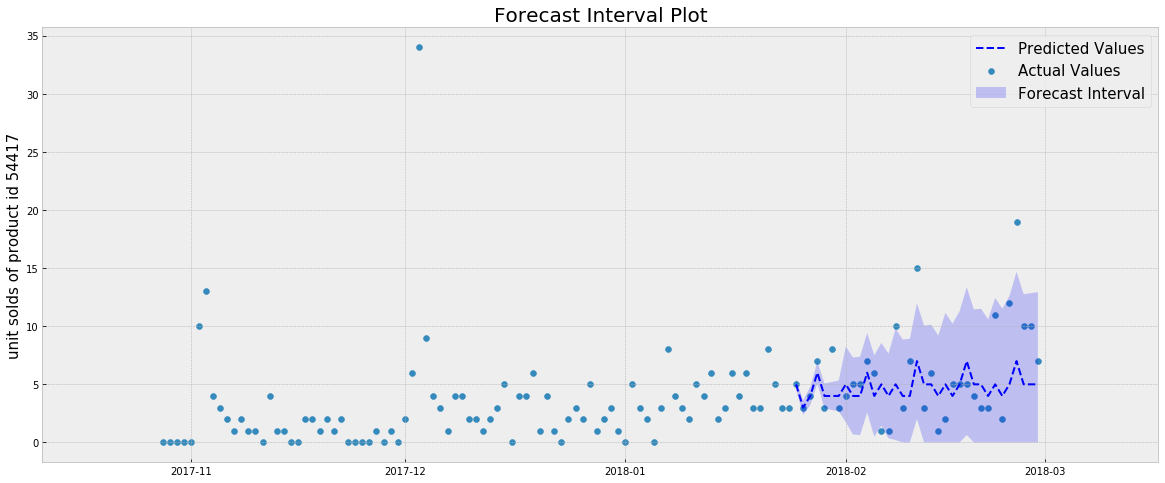

In [3]:
unique_products = df_sales['product_id'].unique()
for sku in unique_products:
    print(sku)
    df_sku = df[df['product_id'] == sku]  
    y = df_sku['units_sold']
    
    # aggreage daily data
    sold_daily = df_sku['units_sold'].groupby(pd.Grouper(freq='D')).sum()
    prices_mean_daily = df_sku['selling_price'].groupby(pd.Grouper(freq='D')).mean() 

    # split into train test 
    n_test = 35  # 20 weeks of prediction

    train = sold_daily.iloc[:-(n_test)]
    test = sold_daily.tail(n_test)
    price_mean_test = prices_mean_daily.tail(n_test)
    
    yhat_naive = train.tail(n_test)
    print_relevant_metrics(test.values, yhat_naive.values, 'naive model for {}'.format(sku),  price_mean_test)

    model_name = 'ES for {}'.format(sku)
    params = {'trend': 'add', 'seasonal':'add', 'seasonal_periods': 7}

    model = ExponentialSmoothing(train, **params)
    model_fit = model.fit()
    yhat = model_fit.forecast(35).clip(0).round(0)
    
    print_relevant_metrics(test, yhat, model_name,  price_mean_test)
    
    # build forecast_interval
    sigma_hat = np.array([forecast_stderrors(model_fit, seasonal_periods=7, steps=h) for h in range(1,36)])
    lower, upper = gaussian_confidence_bands(yhat, sigma_hat, alpha=0.95)

    df_interval = pd.DataFrame({
        'y': test,
        'yhat': yhat,
        'sigma_hat': sigma_hat,
        'lower': lower,
        'upper': upper
    })
    plot_forecast_interval(df_interval, sold_daily.tail(135), ts_name='unit solds of product id {}'.format(sku))
    plt.show()    